In [15]:
# генератор псевдослучайной равномернораспределенной величины
import random
def gen():
    arr = [] 
    a = 630360016
    m = 2147483647
    n = 10
    for i in range(n):
        x = random.randint(1000000000, 1500000000)
        xx = a*x % m
        y = xx/m
        arr.append(y)
    return arr

In [16]:
# последовательность интервалов по заданному ряду распределения 
def intervals(xi, pi):
    y = {}
    x = []
    x.append(0) 
    s = 0
    for i in range(len(pi)-1):
        s = s + pi[i]
        x.append(s)
        y[xi[i]] = [x[i],x[i+1]]   
    y[xi[len(xi)-1]] = [x[len(x)-1], 1]
    return y

In [17]:
# ключ словаря по значению
def get_key(val, y): 
    for key, value in y.items(): 
         if val == value: 
             return key
    return "key doesn't exist"

In [18]:
# генератор дискретной случайной величины
def gendis(xi, pi):
    y = intervals(xi, pi)
    x = []
    arr = []
    for k in range(1000):
        arr.append(gen()[0]) 
    for i in range(len(arr)):
        for j in y:
            if arr[i] <= y[j][1] and arr[i] >= y[j][0]:
                x.append(get_key(y[j], y))
        if len(x) == 10000:
            break
    return x

In [19]:
# вероятность распределения по закону Пуассона
import math
def p(xi, l):
    ll = math.exp(-l)
    pi = []
    for i in range(len(xi)):
        pi.append(l**xi[i]*ll/math.factorial(xi[i]))
    return pi

In [20]:
# Мат. ожидание
def expectedV(x):
    s = sum(x)
    return s/len(x)

In [21]:
# дисперсия
def disp(x):
    s, ss = 0.0, 0.0
    for k in x:
        s += (k - expectedV(x))**2
        ss = s/(len(x)-1)
    return (ss)

In [22]:
# Корреляция
def cor(x):
    n = len(x)
    max_j = 20
    k = [0] * max_j
    for j in range(1, max_j):
        k[j] = sum([(x[i] - expectedV(x)) * (x[i + j] - expectedV(x)) for i in range(n-j)]) / (n-j)
    p = [float(elem)/disp(x) for elem in k]
    return p

In [23]:
# доверительный интервал
import math
def conf_interv(x):
    m = [expectedV(x) - 1.96*math.sqrt(disp(x))/math.sqrt(len(x)), expectedV(x) + 1.96*math.sqrt(disp(x))/math.sqrt(len(x))]
    return m

In [24]:
# график корреляции
def cor_chart(c, color):
    fig = plt.figure(figsize=(5,5))
    plt.scatter(list(range(1, len(c)+1)), c, color=color)
    plt.ylabel('значения корреляционной функции')
    plt.xlabel('номера значений')
    plt.title('График корреляции')

In [25]:
# набор координат для графика частоты появления сл. вел.
import collections
def get_bars(x):
    n = 1000
    c = dict(collections.Counter(x[0:n]))
    yy = list(c.values())
    xx = list(c.keys())
    return (xx, yy)
    

In [26]:
# график распределения случайной величины
from matplotlib import pyplot as plt
def chart(x, color):
    xx = []
    yy = []
    for i in range(len(x) - 1):
        xx.append(x[i])
        yy.append(x[i+1]/1000)
    fig = plt.figure(figsize=(5,5))
    plt.scatter(xx,yy, color = color)

In [27]:
# график частоты появления случайной величины
def chart_bars(x, color): #color - str type   
    n = 100
    xx, yy = get_bars(x)
    fig = plt.figure(figsize=(5,5))
    plt.bar(xx, yy, align='center', width = 0.5, color = color)
    plt.xticks(xx)
    plt.ylabel('частота появления')
    plt.xlabel('значения случайной величины')
    plt.title('График частоты появления случайной величины')

Случайная дискретная величина Xi:  [3, 15, 15, 15, 15, 5, 3, 5, 3, 15, 3, 20, 5, 5, 3, 15, 8, 2, 15] 

i =  1000 

Мат.ожидание =  9.374 

Дисперсия =  37.94206606606578 

Доверительный интервал =  [8.992217023690948, 9.755782976309053] 



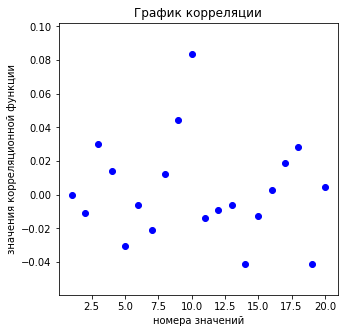

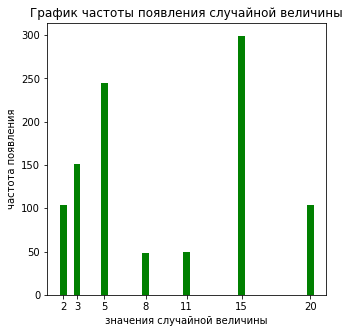

In [28]:
# моделирование случайной дискретной величины по заданному ряду распределения
# метод обратных функций
pi = [0.1, 0.15, 0.25, 0.05, 0.05, 0.3, 0.1]
xi = [2, 3, 5, 8, 11, 15, 20] 

x1 = gendis(xi, pi)
mat1 = expectedV(x1)
d1 = disp(x1)
cr1 = cor(x1)
m1 = conf_interv(x1)

print('Случайная дискретная величина Xi: ', x1[0:19], '\n')
print('i = ',len(x1), '\n')
print('Мат.ожидание = ', mat1, '\n')
print('Дисперсия = ', d1, '\n')
print('Доверительный интервал = ', m1, '\n')


cor_chart(cr1, 'b')
chart_bars(x1, 'g')